(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 

# Extracting the topics using LDA in Python 
This involves :

Tokenization - split texts -> sentences -> words -> lowercase them and remove punctuation.

Words that have fewer than 3 characters are removed.

Stopwords removed

words  are lemmatized

words are stemmed

We use the NLTK and gensim libraries to perform the preprocessing

In [3]:
import pandas as pd
import nltk
nltk.download("all")


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\17655\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\17655\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\17655\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\17655\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\17655\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\1

[nltk_data]    |   Package senseval is already up-to-date!
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     C:\Users\17655\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sentiwordnet is already up-to-date!
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     C:\Users\17655\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sentence_polarity is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     C:\Users\17655\AppData\Roaming\nltk_data...
[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     C:\Users\17655\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sinica_treebank is already up-to-date!
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     C:\Users\17655\AppData\Roaming\nltk_data...
[nltk_data]    |   Package smultron is already up-to-date!
[nltk_data]    | Downloading p

[nltk_data]    |   Package wmt15_eval is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\17655\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | 
[nltk_data]  Done downloading collection all


True

In [4]:
data=pd.read_csv("Reviews_Sentiment.csv")

In [5]:
data.head()

,document_id,clean_text,sentiment
0,0,Who knew a superhero film could be so beautiful?,Positive
1,1,something unique and fresh,Positive
2,2,"Crouching Tiger, Hidden MARVEL . . . And So MU...",Positive
3,3,It's a Visual treat,Neutral
4,4,Best non-avengers MCU movie,Positive


In [6]:
# lower casing the text.
data['clean_text']=data['clean_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [7]:
data.head()

,document_id,clean_text,sentiment
0,0,who knew a superhero film could be so beautiful?,Positive
1,1,something unique and fresh,Positive
2,2,"crouching tiger, hidden marvel . . . and so mu...",Positive
3,3,it's a visual treat,Neutral
4,4,best non-avengers mcu movie,Positive


In [8]:
# 2.2 Removing Punctuation
data['clean_text']=data['clean_text'].str.replace('[^\w\s]','')
data.head()

,document_id,clean_text,sentiment
0,0,who knew a superhero film could be so beautiful,Positive
1,1,something unique and fresh,Positive
2,2,crouching tiger hidden marvel and so much ...,Positive
3,3,its a visual treat,Neutral
4,4,best nonavengers mcu movie,Positive


In [9]:
# 2.3 Removal of Stop Words
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['clean_text']=data['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data.head()

,document_id,clean_text,sentiment
0,0,knew superhero film could beautiful,Positive
1,1,something unique fresh,Positive
2,2,crouching tiger hidden marvel much much much ðÿž,Positive
3,3,visual treat,Neutral
4,4,best nonavengers mcu movie,Positive


In [10]:
# tokenization
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
tokenizer = RegexpTokenizer(r'\w+')
p_stemmer = PorterStemmer()
en_stop = stopwords.words('english')
data['Tokenization'] = data['clean_text'].apply(lambda x: tokenizer.tokenize(x))

In [11]:
data['Tokenization']

0              [knew, superhero, film, could, beautiful]
1                             [something, unique, fresh]
2      [crouching, tiger, hidden, marvel, much, much,...
3                                        [visual, treat]
4                        [best, nonavengers, mcu, movie]
                             ...                        
524                                    [definite, watch]
525                                     [word, stunning]
526                         [great, fun, would, rewatch]
527                                            [enjoyed]
528                                 [beautiful, scenery]
Name: Tokenization, Length: 529, dtype: object

In [12]:
data['Tokens'] = data['Tokenization'].apply(lambda x: [i for i in x if not i in en_stop])
data['Stemming'] = data['Tokens'].apply(lambda x: [p_stemmer.stem(i) for i in x])

In [13]:
data['Stemming']

0                 [knew, superhero, film, could, beauti]
1                                 [someth, uniqu, fresh]
2      [crouch, tiger, hidden, marvel, much, much, mu...
3                                        [visual, treat]
4                            [best, nonaveng, mcu, movi]
                             ...                        
524                                     [definit, watch]
525                                         [word, stun]
526                         [great, fun, would, rewatch]
527                                              [enjoy]
528                                    [beauti, sceneri]
Name: Stemming, Length: 529, dtype: object

In [14]:
afterStemming = []
for s in data['Stemming']:
 afterStemming.append(s)

In [15]:
afterStemming

[['knew', 'superhero', 'film', 'could', 'beauti'],
 ['someth', 'uniqu', 'fresh'],
 ['crouch', 'tiger', 'hidden', 'marvel', 'much', 'much', 'much', 'ðÿž'],
 ['visual', 'treat'],
 ['best', 'nonaveng', 'mcu', 'movi'],
 ['fun', 'film', 'suppos'],
 ['honestli', 'great', 'beauti', 'martial', 'art', 'galor'],
 ['marvel', 'pattern'],
 ['bad', 'peopl', 'say', 'also', 'quit', 'good'],
 ['what', 'extrem', 'posit', 'review'],
 ['honest',
  'decent',
  'movi',
  'dont',
  'expect',
  'anyth',
  'havent',
  'alreadi',
  'seen',
  'marvel'],
 ['strong', '710'],
 ['return', 'good', 'marvel', 'movi'],
 ['absolut', 'banger'],
 ['amaz'],
 ['stop', 'disney', 'marvel', 'dammit'],
 ['probabl', 'one', 'worst', 'mcu', 'movi'],
 ['great', 'visual', 'horrid', 'storylin'],
 ['one', 'best', 'marvel', 'movi', 'year'],
 ['fantast', 'movi'],
 ['martin', 'scorses', 'right'],
 ['good', 'review', 'say'],
 ['great', 'visual', 'slow', 'move'],
 ['fantasticðÿðÿðÿ'],
 ['top', 'tier', 'mcu'],
 ['bore'],
 ['enjoy', 'action',

In [16]:
pip install -U gensim

Requirement already up-to-date: gensim in d:\anaconda3\lib\site-packages (4.1.2)
Note: you may need to restart the kernel to use updated packages.


In [17]:
# Gensim
from gensim import corpora, models

import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [18]:
# Build the bigram and trigram models
bi_gram = models.Phrases(afterStemming, min_count=5, threshold=100) # higher threshold fewer phrases.
tri_gram = models.Phrases(bi_gram[afterStemming], threshold=100) 

In [19]:
# Faster way to get a sentence clubbed as a trigram/bigram
bi_gram_mod = models.phrases.Phraser(bi_gram)
tri_gram_mod = models.phrases.Phraser(tri_gram)

In [20]:
# See trigram example
print(tri_gram_mod[bi_gram_mod[afterStemming[0]]])

['knew', 'superhero', 'film', 'could', 'beauti']


In [21]:
# Define functions for  bigrams, trigrams 
def func_bigrams(texts):
    return [bi_gram_mod[doc] for doc in texts]

def func_trigrams(texts):
    return [tri_gram_mod[bi_gram_mod[doc]] for doc in texts]

In [22]:
# Define functions for lemmatization
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for s in texts:
        doc = nlp(" ".join(s)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [23]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [24]:
import spacy

In [26]:
data_words_bigrams = func_bigrams(afterStemming)

In [28]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en

#nlp = spacy.load('en', disable=['parser', 'ner'])
nlp = spacy.load("en_core_web_sm")


In [29]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [30]:
print(data_lemmatized[:1])

[['know', 'superhero', 'film']]


In [31]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

In [32]:
# Create Corpus
texts = data_lemmatized

In [33]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [52]:
print(len(corpus))

529


Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).

In [34]:
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1)]]


This is used as the input by the LDA model.

In [35]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('film', 1), ('know', 1), ('superhero', 1)]]

In [37]:
# Build LDA model
lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [46]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
print(lda_model)
doc_lda = lda_model[corpus]

[(0, '0.640*"movi" + 0.017*"shape" + 0.007*"touch" + 0.001*"need" + 0.001*"drug" + 0.001*"anyon" + 0.001*"less" + 0.001*"rate" + 0.001*"test" + 0.001*"solo"'), (1, '0.383*"watch" + 0.048*"worth" + 0.001*"definit" + 0.001*"go" + 0.001*"plea" + 0.001*"spectacular" + 0.001*"visit" + 0.001*"theater" + 0.001*"risk" + 0.001*"covid"'), (2, '0.202*"bad" + 0.078*"do" + 0.043*"jaw" + 0.043*"era" + 0.034*"think" + 0.011*"right" + 0.011*"formula" + 0.011*"outstand" + 0.011*"miss" + 0.011*"probabl"'), (3, '0.019*"going" + 0.019*"rememb" + 0.019*"rise" + 0.002*"fusion" + 0.002*"yawn" + 0.002*"overhyp" + 0.002*"powerhous" + 0.002*"accept" + 0.002*"box" + 0.002*"almost"'), (4, '0.715*"marvel" + 0.005*"mold" + 0.005*"break" + 0.005*"reccomend" + 0.005*"highli" + 0.005*"return" + 0.001*"final" + 0.001*"kind" + 0.001*"back" + 0.001*"way"'), (5, '0.161*"fun" + 0.141*"make" + 0.103*"superhero" + 0.076*"entertain" + 0.064*"perfect" + 0.055*"masterpiec" + 0.042*"start" + 0.039*"ride" + 0.025*"stand" + 0.006*

In [51]:
print(doc_lda[2])

([(4, 0.12001933), (5, 0.010560758), (11, 0.012872546), (12, 0.02039238), (13, 0.75332373)], [(3, [13]), (4, [13]), (5, [4]), (6, [13]), (7, [13]), (8, [13])], [(3, [(13, 0.99991614)]), (4, [(13, 0.9999135)]), (5, [(4, 0.9999978)]), (6, [(13, 2.9999974)]), (7, [(13, 0.99991614)]), (8, [(13, 0.99991614)])])


In [43]:
# print out first 5 topics
for i, topic in enumerate(lda_model.print_topics(5)):
    print ('%d: %s\n'%(i+1, topic))

1: (3, '0.019*"going" + 0.019*"rememb" + 0.019*"rise" + 0.002*"fusion" + 0.002*"yawn" + 0.002*"overhyp" + 0.002*"powerhous" + 0.002*"accept" + 0.002*"box" + 0.002*"almost"')

2: (17, '0.076*"know" + 0.017*"highway" + 0.017*"desert" + 0.017*"dark" + 0.002*"glad" + 0.002*"lad" + 0.002*"comic" + 0.002*"new" + 0.002*"plea" + 0.002*"powerhous"')

3: (11, '0.292*"stori" + 0.110*"origin" + 0.099*"expect" + 0.091*"good" + 0.073*"quit" + 0.052*"yet" + 0.039*"amaz" + 0.011*"peopl" + 0.009*"also" + 0.004*"roller"')

4: (4, '0.715*"marvel" + 0.005*"mold" + 0.005*"break" + 0.005*"reccomend" + 0.005*"highli" + 0.005*"return" + 0.001*"final" + 0.001*"kind" + 0.001*"back" + 0.001*"way"')

5: (12, '0.491*"good" + 0.176*"well" + 0.113*"love" + 0.041*"far" + 0.003*"old" + 0.003*"mostli" + 0.003*"bore" + 0.000*"fail" + 0.000*"first" + 0.000*"half"')



How to interpret this?

Topic 0 is a represented as 

(0, '0.640*"movi" + 0.017*"shape" + 0.007*"touch" + 0.001*"need" + 0.001*"drug" + 0.001*"anyon" + 0.001*"less" + 0.001*"rate" + 0.001*"test" + 0.001*"solo"')

It means the top 10 keywords that contribute to this topic are: movi -> shape -> touch  and the weight of ‘movi’ on topic 0 is 0.640

The weights reflect how important a keyword is to that topic.

Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is.

In [41]:
# a measure of how good the model is. lower the better.
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  



Perplexity:  -13.814394793652058


In [42]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.6010310331104842


Clustering

Before we cluster.
We should know what parameters you are choosing and why: 

LINKAGE determines which distance to use between a set of observations. 
The algorithm merges pairs of clusters that minimize the chosen criteria.

**ward** minimizes the variance of the clusters being merged.

**average** uses the average of the distances of each observation of the two sets.

**complete or maximum linkage** uses the maximum distances between all observations of the two sets.

single uses the minimum of the distances between all observations of the two sets.
I want to minimize the variance between the merged clusters. Now, I can only use Euclidean distance.

In [53]:
# extract all document-topic distritbutions to dictionnary
document_key = list(data.index) ##get index of transcripts for topic in each
document_topic = {}
for doc_id in range(len(corpus)):
    docbok = corpus[doc_id]
    doc_topics = lda_model.get_document_topics(docbok, 0)
    tmp = []
    for topic_id, topic_prob in doc_topics:
        tmp.append(topic_prob)
    document_topic[document_key[doc_id]] = tmp

In [55]:
topics_all = pd.DataFrame.from_dict(document_topic, orient='index')
topic_column_names = ['topic_' + str(i) for i in range(0, 20)]
topics_all.columns = topic_column_names
display(topics_all.head())

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,0.017540,0.009078,0.010624,0.006393,0.028105,0.252513,0.013740,0.013328,0.009854,0.013754,0.246857,0.027663,0.043824,0.010251,0.008040,0.019839,0.010582,0.236723,0.011608,0.009682
1,0.056482,0.029232,0.034212,0.020587,0.090503,0.073081,0.044243,0.042919,0.031732,0.044290,0.054865,0.089080,0.141119,0.033009,0.025890,0.063885,0.034076,0.022237,0.037380,0.031177
2,0.008162,0.004224,0.004944,0.002975,0.120019,0.010561,0.006393,0.006202,0.004585,0.006400,0.007928,0.012873,0.020392,0.753324,0.003741,0.009232,0.004924,0.003213,0.005402,0.004505
3,0.022775,0.011787,0.013795,0.008301,0.036493,0.029468,0.017840,0.017306,0.012795,0.017859,0.022123,0.035919,0.056902,0.013310,0.010439,0.025760,0.013740,0.008966,0.611850,0.012571
4,0.032460,0.016800,0.019662,0.011831,0.052012,0.041999,0.025426,0.024665,0.018236,0.025453,0.031531,0.051211,0.506388,0.018970,0.014879,0.036714,0.019583,0.012780,0.021482,0.017917


In [121]:
topics_all = pd.DataFrame.from_dict(document_topic, orient='index')
topic_column_names = ['topic_' + str(i) for i in range(0, 20)]
topics_all.columns = topic_column_names
# topics_all.to_csv(os.path.join(BASE_PATH, "topic_propensities.csv"))

# print(topics_all.describe())
display(topics_all.head())

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,0.017540,0.009078,0.010624,0.006393,0.028105,0.252513,0.013740,0.013328,0.009854,0.013754,0.246857,0.027663,0.043824,0.010251,0.008040,0.019839,0.010582,0.236723,0.011608,0.009682
1,0.056482,0.029232,0.034212,0.020587,0.090503,0.073081,0.044243,0.042919,0.031732,0.044290,0.054865,0.089080,0.141119,0.033009,0.025890,0.063885,0.034076,0.022237,0.037380,0.031177
2,0.008162,0.004224,0.004944,0.002975,0.120019,0.010561,0.006393,0.006202,0.004585,0.006400,0.007928,0.012873,0.020392,0.753324,0.003741,0.009232,0.004924,0.003213,0.005402,0.004505
3,0.022775,0.011787,0.013795,0.008301,0.036493,0.029468,0.017840,0.017306,0.012795,0.017859,0.022123,0.035919,0.056902,0.013310,0.010439,0.025760,0.013740,0.008966,0.611850,0.012571
4,0.032460,0.016800,0.019662,0.011831,0.052012,0.041999,0.025426,0.024665,0.018236,0.025453,0.031531,0.051211,0.506388,0.018970,0.014879,0.036714,0.019583,0.012780,0.021482,0.017917


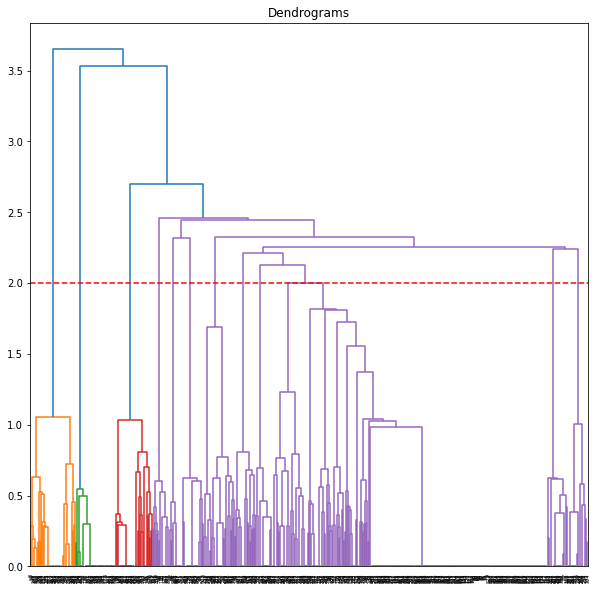

In [124]:
%matplotlib inline  
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
plt.figure(figsize=(10, 10))  
plt.title("Dendrograms")  
dend = hierarchy.dendrogram(hierarchy.linkage(topics_all, method='ward'))
plt.axhline(y=2, color='r', linestyle='--')

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 2 and cut the dendrogram at that point(horizontal dotted line).

We have 12 clusters as this line cuts the dendrogram at 12 points. Let’s now apply hierarchical clustering for these clusters.

In [126]:
from sklearn.cluster import AgglomerativeClustering
cluster_model = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
cluster = cluster_model.fit_predict(topics_all).tolist()
# print(type(cluster))
topics_all["cluster"] = cluster
##VISUALIZZATION
df_for_h_visual = df 
## derived from topics_all to get 1 topic per text- refer to part 3 of this series.
df_for_h_visual["cluster"] = topics_all["cluster"]
#df_for_h_visual.drop(['propensity'], axis = 1, inplace=True)
df_for_h_visual.topic.fillna(value="Unknown", inplace=True)
df_for_h_visual.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,SUMMARY,topic,cluster
0,0.017540,0.009078,0.010624,0.006393,0.028105,0.252513,0.013740,0.013328,0.009854,0.013754,...,0.010251,0.008040,0.019839,0.010582,0.236723,0.011608,0.009682,,Unknown,3
1,0.056482,0.029232,0.034212,0.020587,0.090503,0.073081,0.044243,0.042919,0.031732,0.044290,...,0.033009,0.025890,0.063885,0.034076,0.022237,0.037380,0.031177,,Unknown,0
2,0.008162,0.004224,0.004944,0.002975,0.120019,0.010561,0.006393,0.006202,0.004585,0.006400,...,0.753324,0.003741,0.009232,0.004924,0.003213,0.005402,0.004505,tiger hidden marvel,Unknown,11
3,0.022775,0.011787,0.013795,0.008301,0.036493,0.029468,0.017840,0.017306,0.012795,0.017859,...,0.013310,0.010439,0.025760,0.013740,0.008966,0.611850,0.012571,,Unknown,1
4,0.032460,0.016800,0.019662,0.011831,0.052012,0.041999,0.025426,0.024665,0.018236,0.025453,...,0.018970,0.014879,0.036714,0.019583,0.012780,0.021482,0.017917,,Unknown,9


In [127]:
print(pd.unique(cluster))

[ 3  0 11  1  9  7 10  5  2  8  4  6]


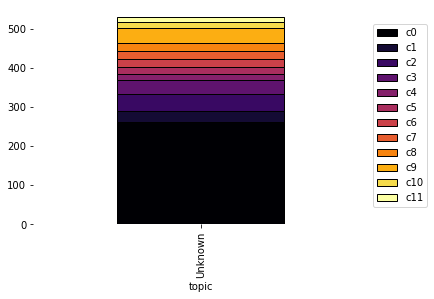

In [128]:
df_histo = df_for_h_visual.groupby(['topic','cluster']).count().reset_index()
df_histo = df_histo.pivot(index='topic', columns='cluster', values='SUMMARY')
df_histo.columns = ["c0", "c1", "c2", "c3","c4","c5","c6","c7","c8","c9","c10","c11"]

ax = df_histo.plot.bar(stacked=True,   colormap='inferno', edgecolor='black', linewidth=1)

ax.legend(loc='center left', bbox_to_anchor=(1.0, .5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()